<a href="https://colab.research.google.com/github/dimeking/playground/blob/master/Covid_Rt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid-Rt**
*   Read Data from https://rt.live
*   Calculate n-Day Average (Rolling Mean, SMA) of daily Mean R-value



In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from google.colab import widgets
from google.colab import output


In [0]:
# Get data file from rt.live 
def get_datafile():
  file_name = 'https://d14wlfuexuxgcm.cloudfront.net/covid/rt.csv'
  df = pd.read_csv(file_name)
  return df

# calculate the n-Day Rolling Mean (Simple Moving Average)  
def rolling_mean(datafile, size, cols):
  grouper = datafile.groupby('region').rolling(window=size).mean()[cols]
  df_ML_SMA =  grouper.to_frame(name = 'rolling_mean').reset_index().drop('level_1', axis=1)
  df_ML_SMA['date'] = datafile['date']
  df_ML_SMA['mean'] = datafile['mean']
  return df_ML_SMA

# Plot Methods

*   Time Series for Most & Least 5 Viral States
*   Bar Chart for States (Virality, Alphabetical)



In [0]:
# Plot time series for the given states
def plot_timeseries_rollingmean(datafile, states, title):
  plt.figure(figsize=[10,8])
  plt.grid(True)


  for state in states:
    df_ML_SMA_state = datafile[datafile['region']==state]
    dates = pd.to_datetime(df_ML_SMA_state['date'])
    plt.plot(dates, df_ML_SMA_state['rolling_mean'], label=state)

  plt.xlabel('date')
  plt.ylabel('R-value (Rolling Mean)')
  plt.title(title)
  plt.legend(loc=1)

# Plot bar chart for states (sorted & alphabetical)
def plot_bars_rollingmean(datafile, title):
  states = datafile['region']
  plt.figure(figsize=[30,8])
  plt.grid(True)
  
  xpos = np.arange(len(states))
  plt.xticks(xpos, states)
  # plt.bar(xpos, datafile['ML_SMA'])
  x = xpos
  y = datafile['rolling_mean']

  low = y <= 0.9
  high = y > 1.1
  middle = (y > low) | (y <= high)

  plt.bar(x[low], y[low], color = 'green')
  plt.bar(x[middle], y[middle], color = 'orange')
  plt.bar(x[high], y[high], color = 'red')

  z = np.linspace(0.9, 0.9, len(y))
  plt.plot(x, z, color='black', linestyle=':')
  z = np.linspace(1.0, 1.0, len(y))
  plt.plot(x, z, color='black', linestyle='--')
  z = np.linspace(1.1, 1.1, len(y))
  plt.plot(x, z, color='black', linestyle=':')

  plt.xlabel('regions')
  plt.ylabel('R-value (Rolling Mean)')
  plt.title(title)
  plt.legend(loc=1)


### Run: Read, Calculate & Plot

In [0]:
df = get_datafile() # acquire the data

states = df['region'].unique() # unique regions/states
date = df['date'].tail(1).iloc[0] # current date

GROUP_SIZE = 5 # For Most & Least Viral Groups

#### Bar Chart for States (Virality, Alphabetical)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


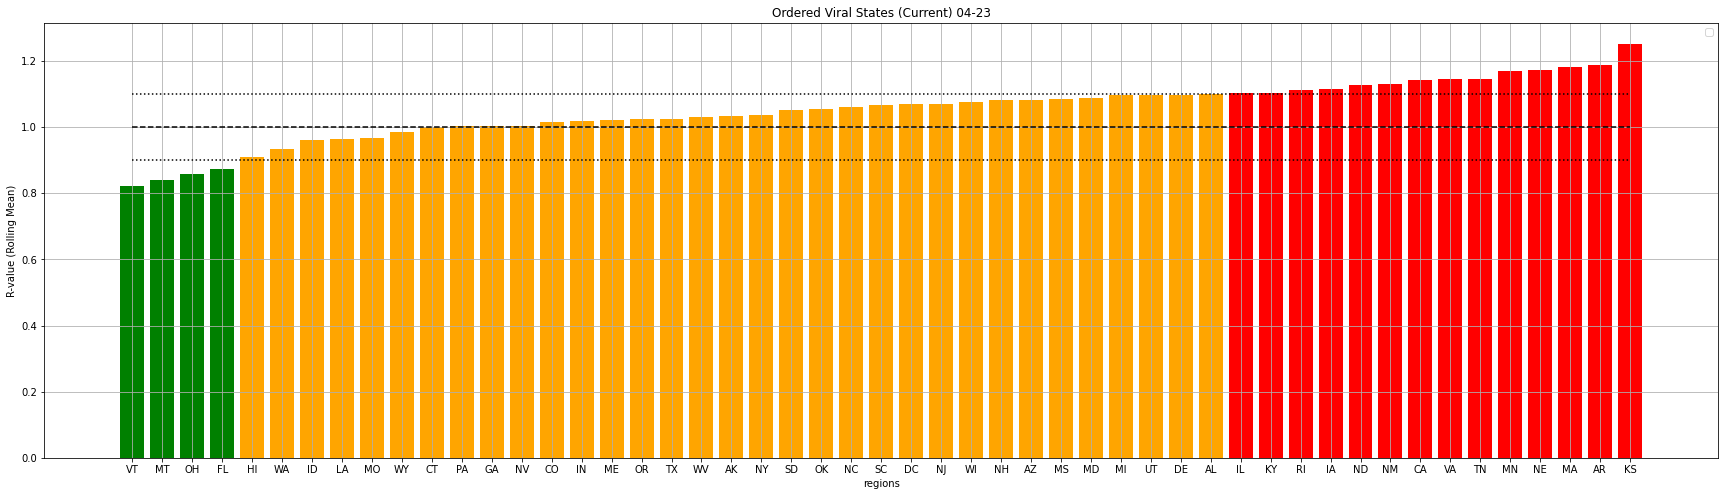

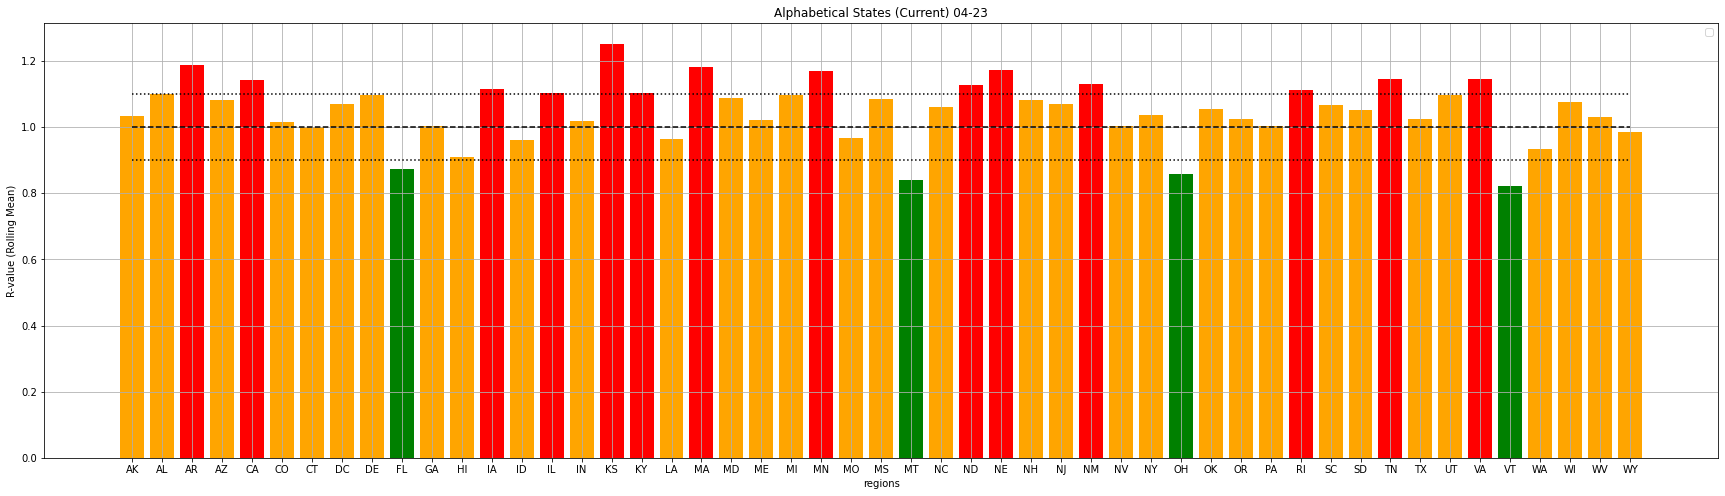

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


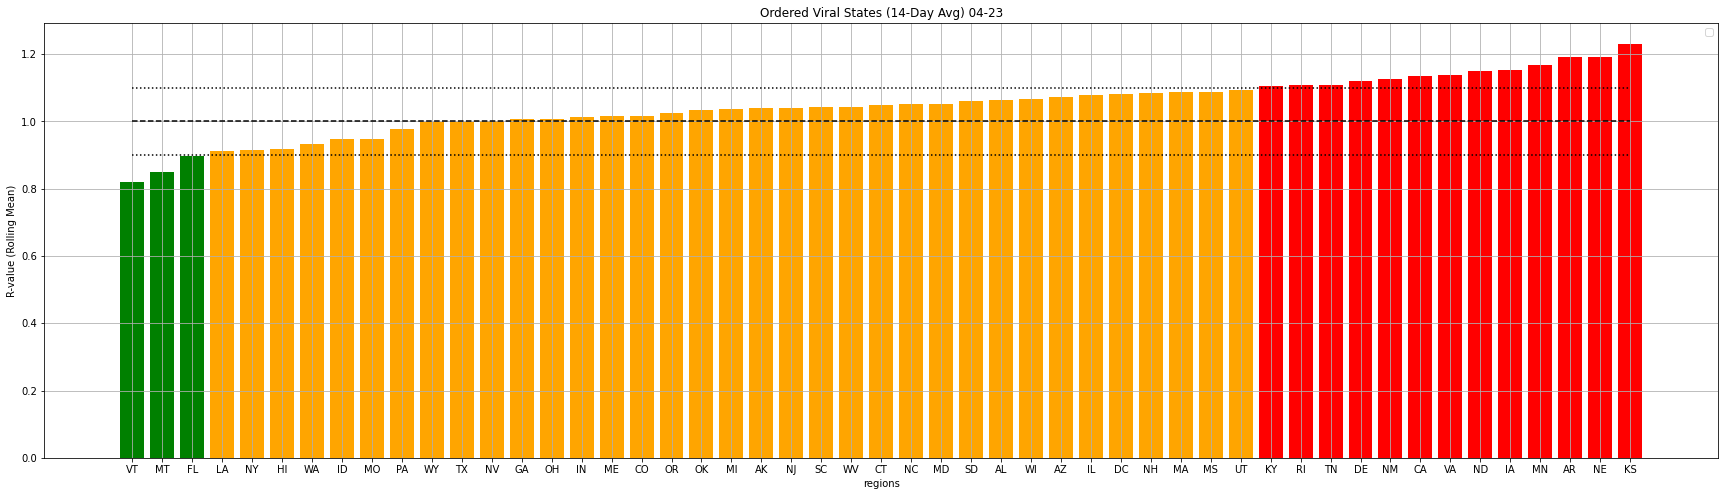

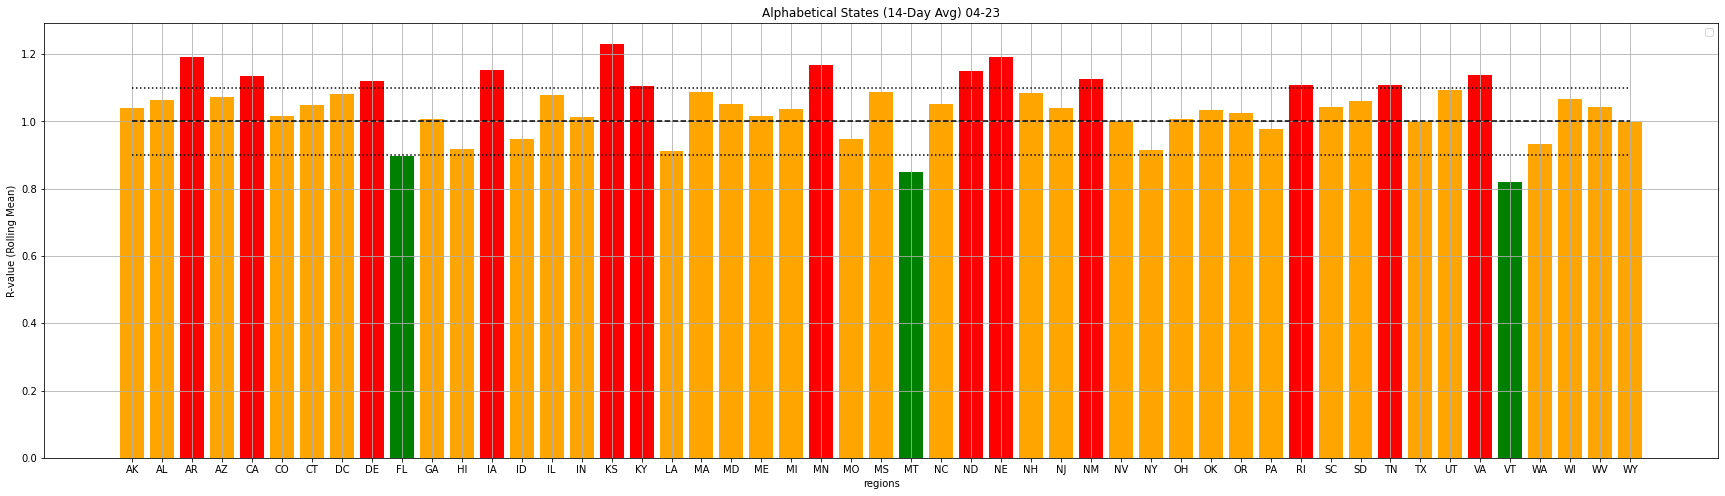

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


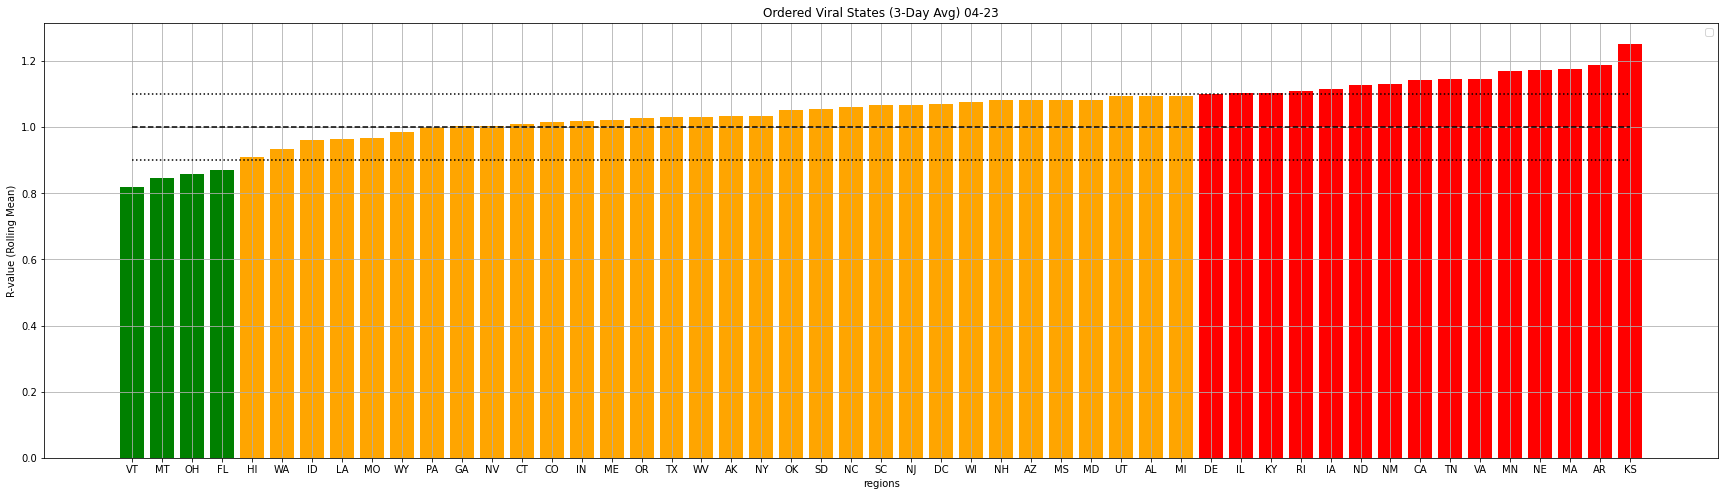

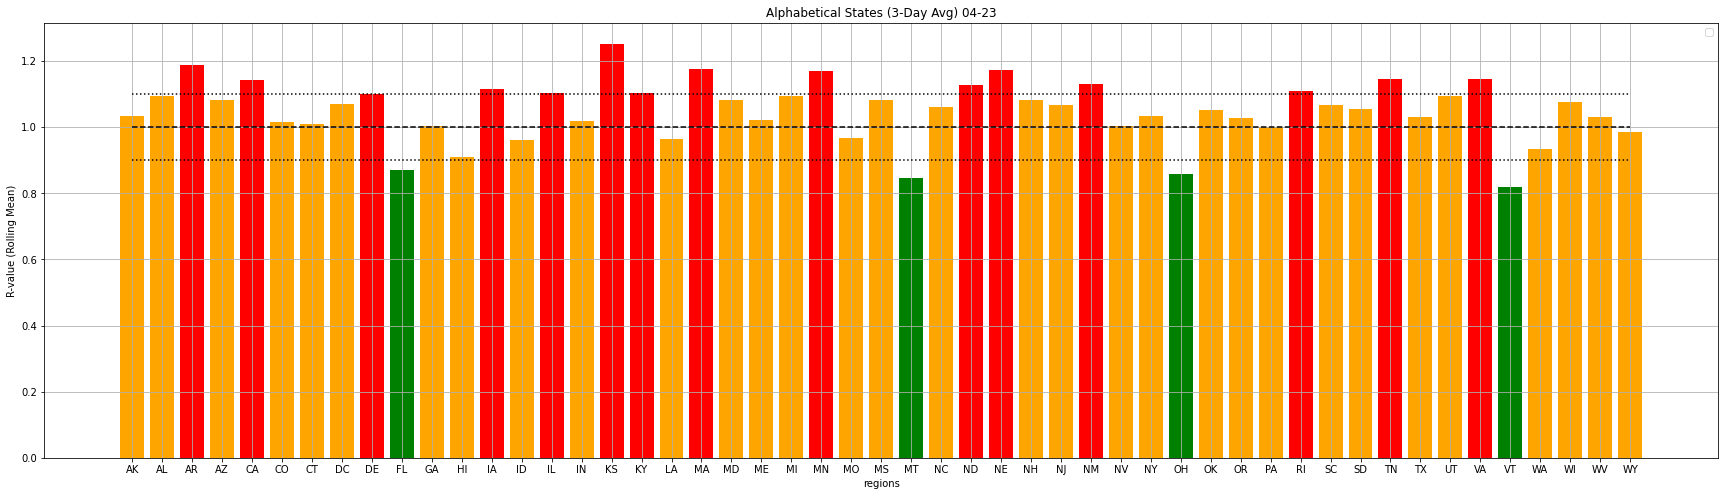

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


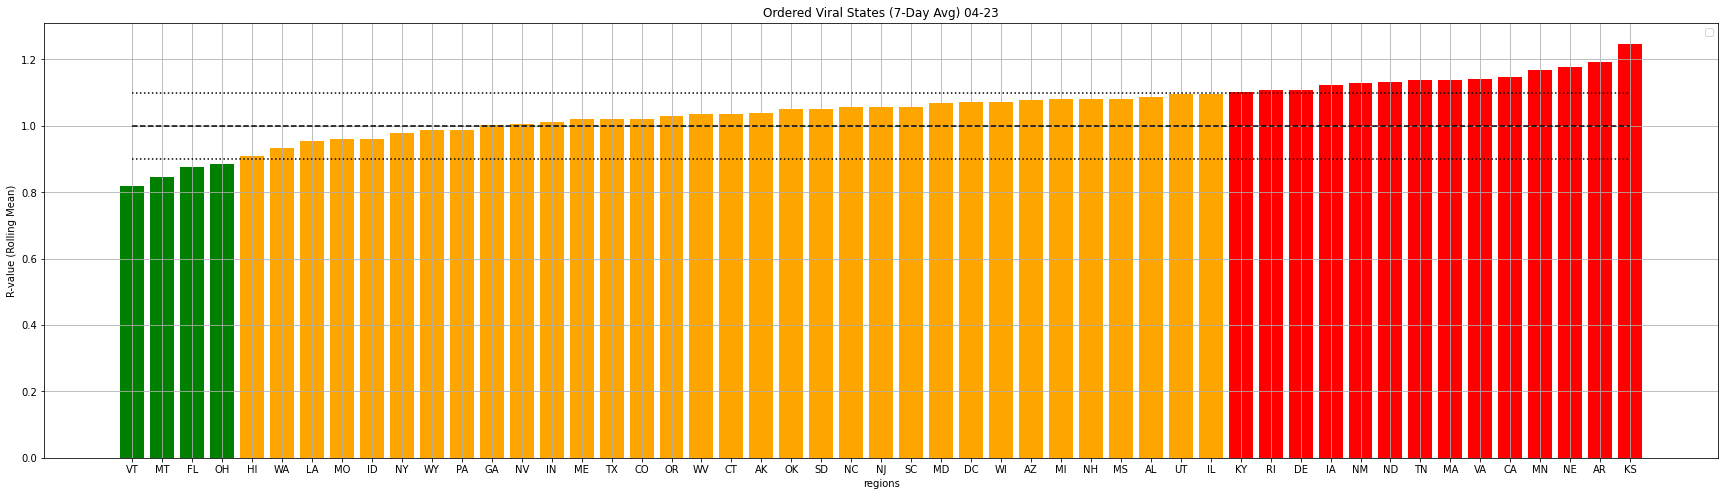

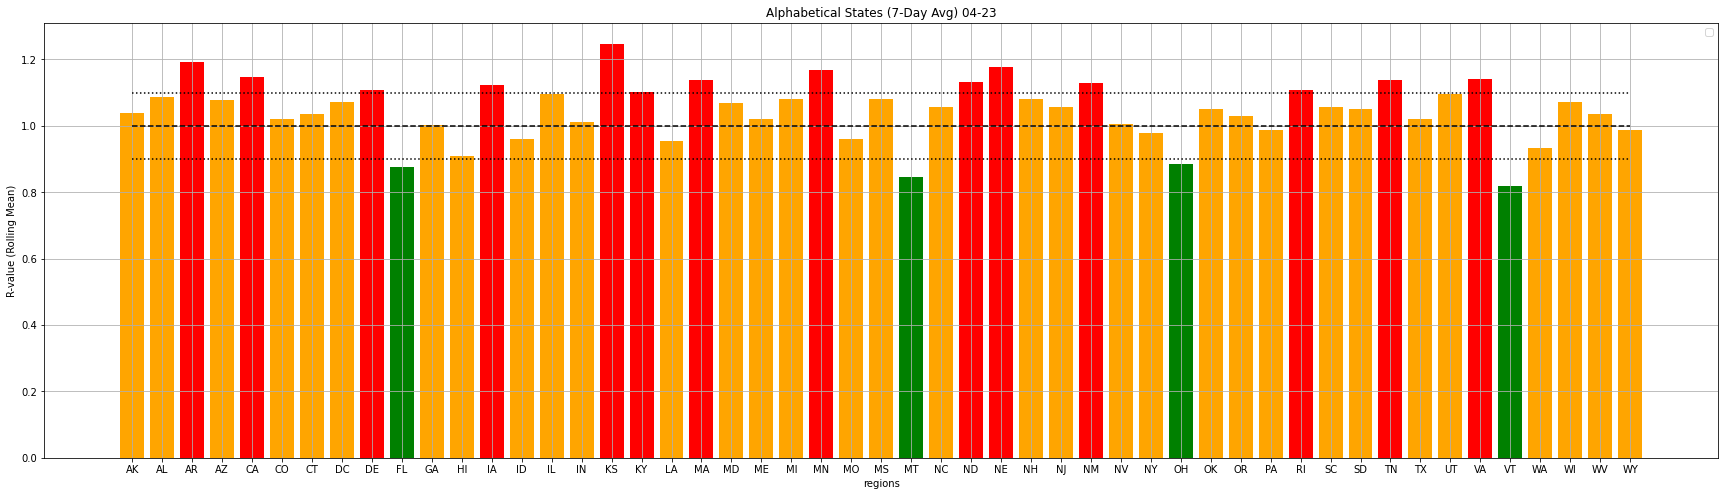

<IPython.core.display.Javascript object>

In [109]:
# Show Bar Chart (Sorted & Alphabetical) that plots 
# 14,7,3-Day Average along with Current in separate Tabs 
DAY_TABS = { 1: 'Current', 14: '14-Day Avg', 3: '3-Day Avg', 7: '7-Day Avg' }
tb = widgets.TabBar(list(DAY_TABS.values()), location='bottom')

for days in DAY_TABS.keys():
  with tb.output_to(DAY_TABS[days]):

    df_ML_SMA = rolling_mean(df, days, 'mean')
    df_ML_SMA_current = df_ML_SMA.groupby('region').tail(1)
    sorted_df_ML_SMA = df_ML_SMA_current.sort_values(by=['rolling_mean'])
    
    plot_bars_rollingmean(sorted_df_ML_SMA, 'Ordered Viral States (' + DAY_TABS[days] + ') ' + date[-5:])
    plot_bars_rollingmean(df_ML_SMA_current, 'Alphabetical States (' + DAY_TABS[days] + ') ' + date[-5:])


#### Time Series for Most & Least 5 Viral States

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,
,


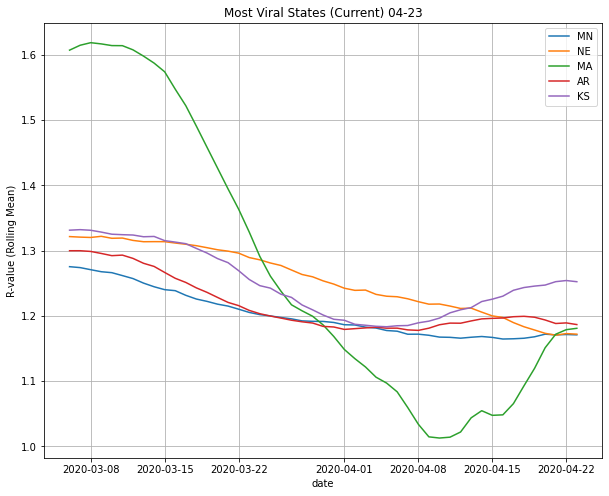

<IPython.core.display.Javascript object>

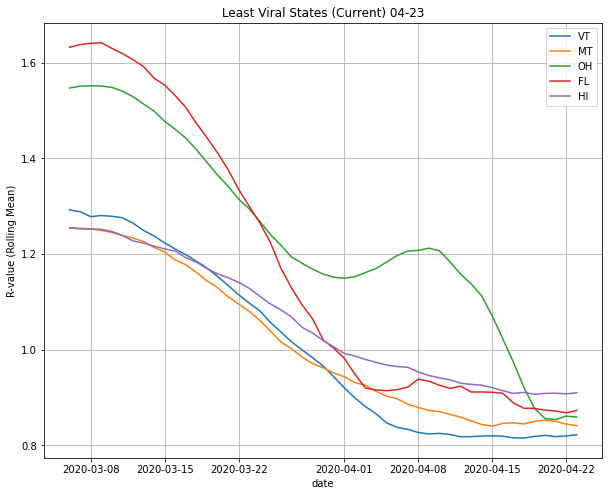

<IPython.core.display.Javascript object>

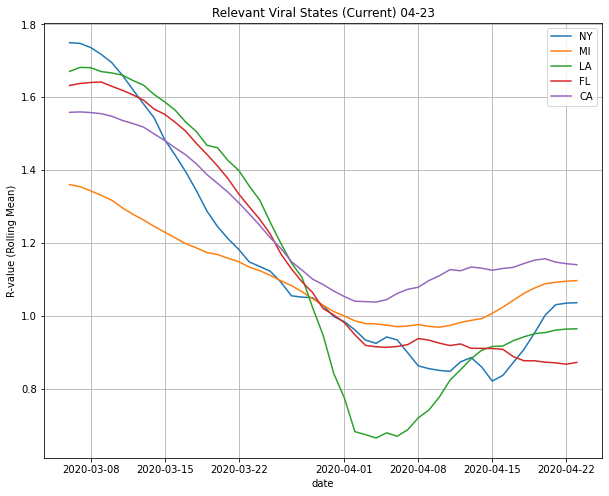

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,
,


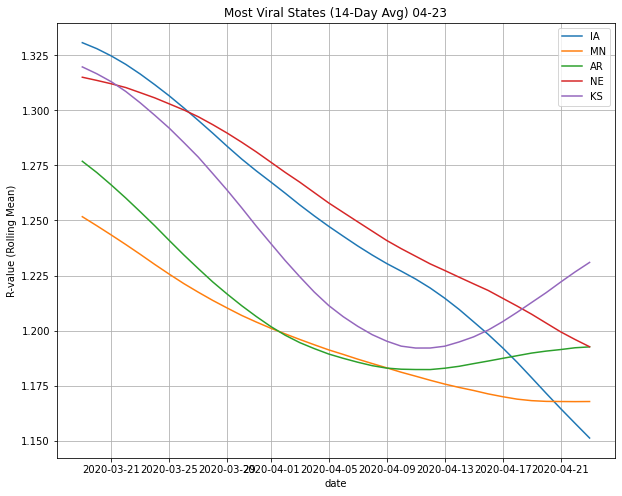

<IPython.core.display.Javascript object>

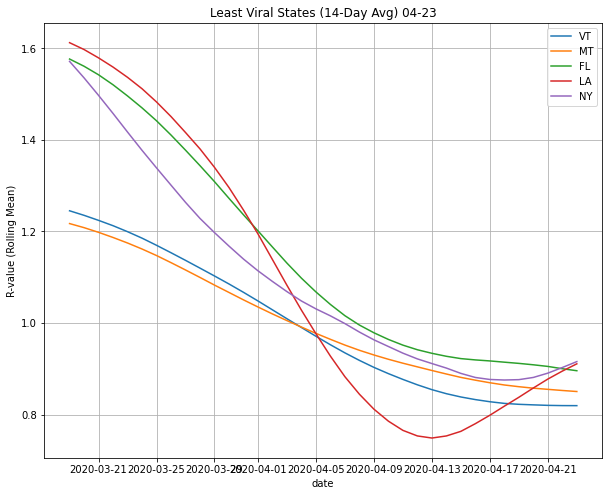

<IPython.core.display.Javascript object>

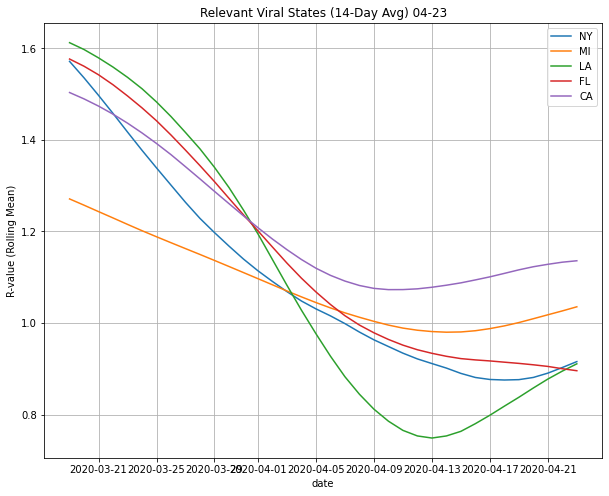

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,
,


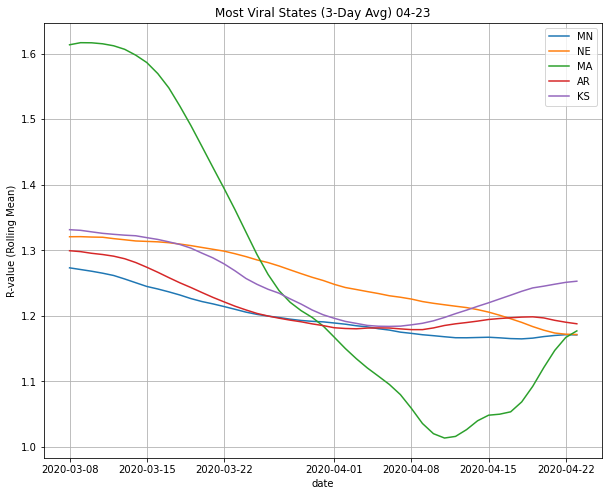

<IPython.core.display.Javascript object>

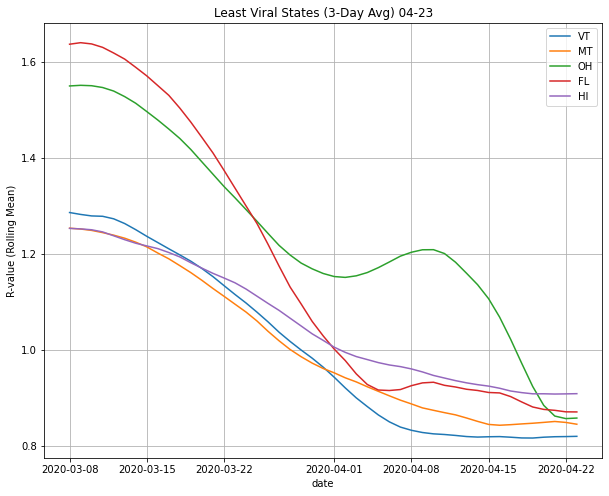

<IPython.core.display.Javascript object>

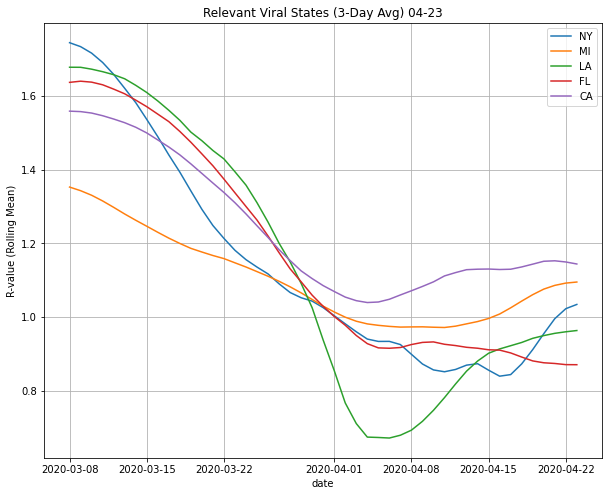

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,
,


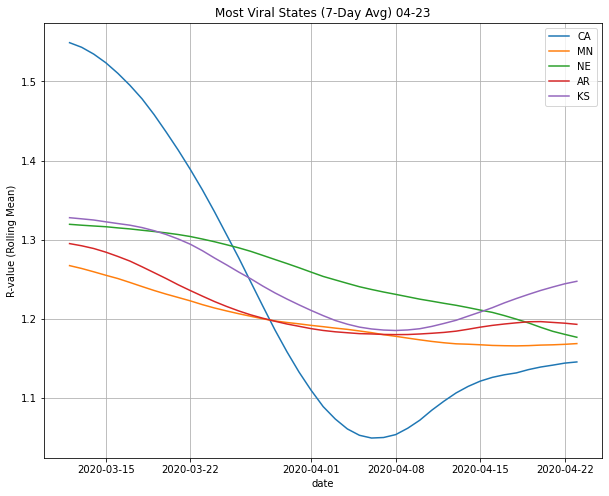

<IPython.core.display.Javascript object>

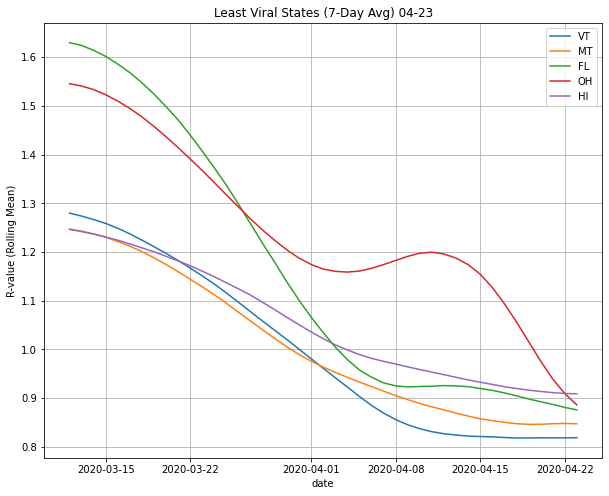

<IPython.core.display.Javascript object>

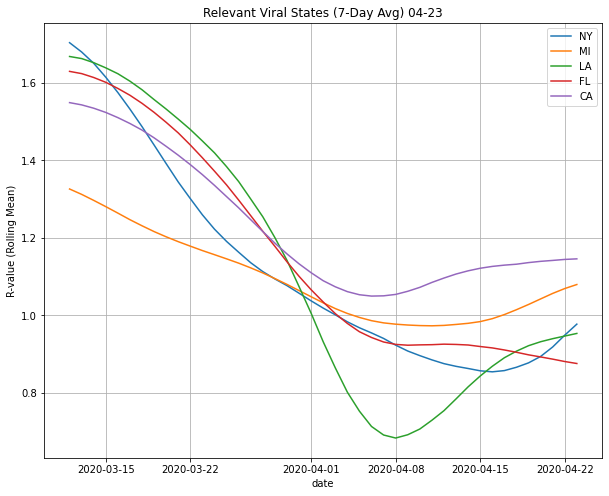

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
# Show Time Series (Most & Least Viral) that plots 
# 14,7,3-Day Average along with Current in separate Tabs 
DAY_TABS = { 1: 'Current', 14: '14-Day Avg', 3: '3-Day Avg', 7: '7-Day Avg' }
tb = widgets.TabBar(list(DAY_TABS.values()), location='bottom')

for days in DAY_TABS.keys():
  with tb.output_to(DAY_TABS[days]):

    df_ML_SMA = rolling_mean(df, days, 'mean')
    df_ML_SMA_current = df_ML_SMA.groupby('region').tail(1)

    sorted_df_ML_SMA = df_ML_SMA_current.sort_values(by=['rolling_mean'])
    sorted_states = sorted_df_ML_SMA['region']

    grid = widgets.Grid(2, 2)
    with grid.output_to(0,0):
      grid.clear_cell()
      plot_timeseries_rollingmean(df_ML_SMA, sorted_states.tail(GROUP_SIZE), 'Most Viral States (' + DAY_TABS[days] + ') ' + date[-5:])
    with grid.output_to(0,1):
      grid.clear_cell()
      plot_timeseries_rollingmean(df_ML_SMA, sorted_states.head(GROUP_SIZE), 'Least Viral States (' + DAY_TABS[days] + ') ' + date[-5:])
    with grid.output_to(1,0):
      grid.clear_cell()
      plot_timeseries_rollingmean(df_ML_SMA, ['NY','MI', 'LA', 'FL','CA'], 'Relevant Viral States (' + DAY_TABS[days] + ') ' + date[-5:])


# Plot 7-day Average of R-value for every state with Widgets TabBar

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

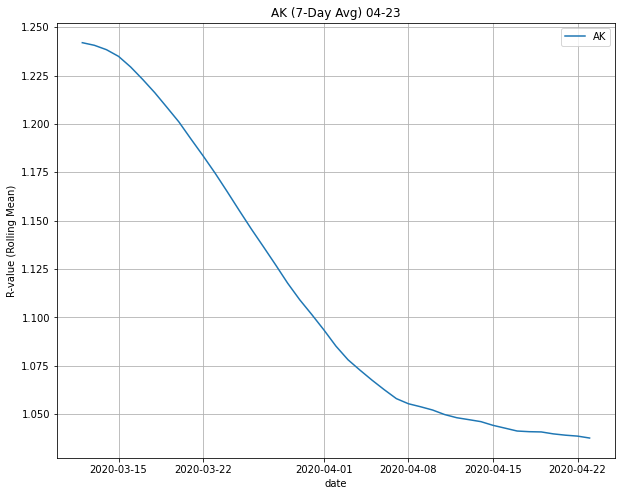

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

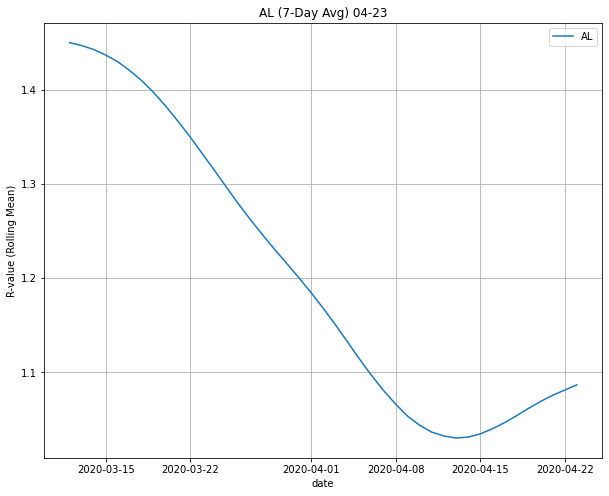

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

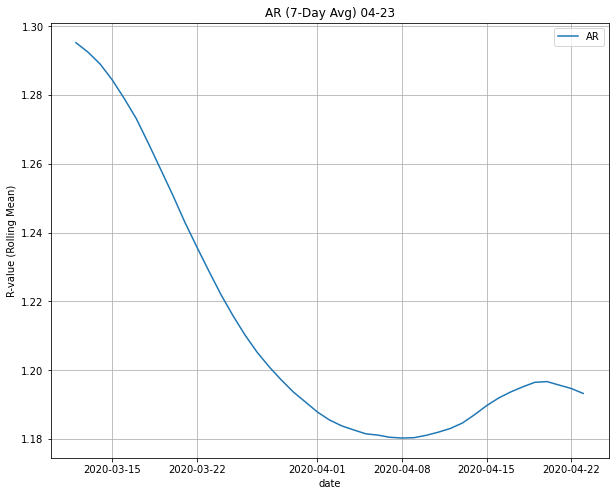

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

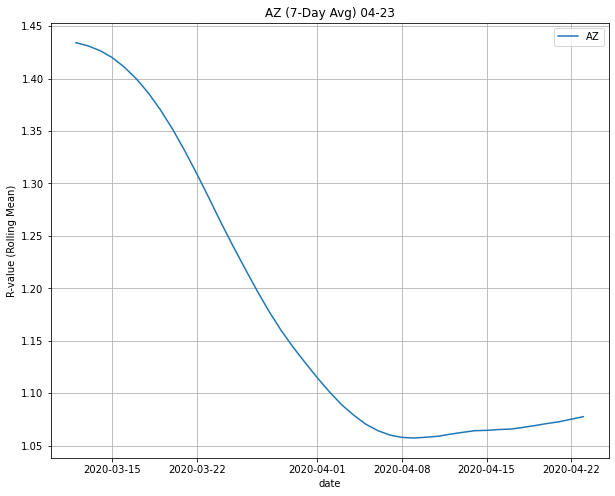

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

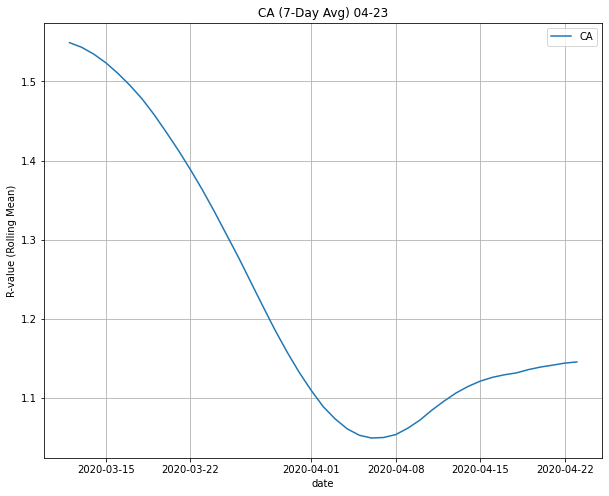

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

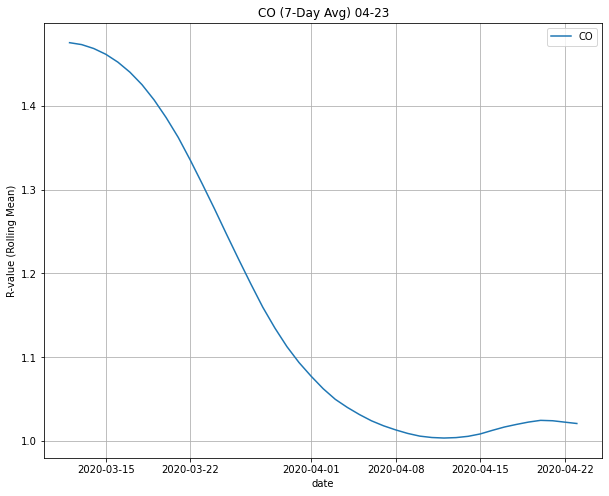

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

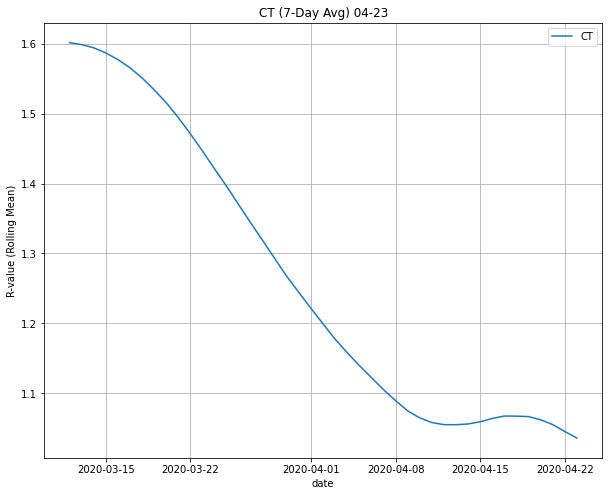

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

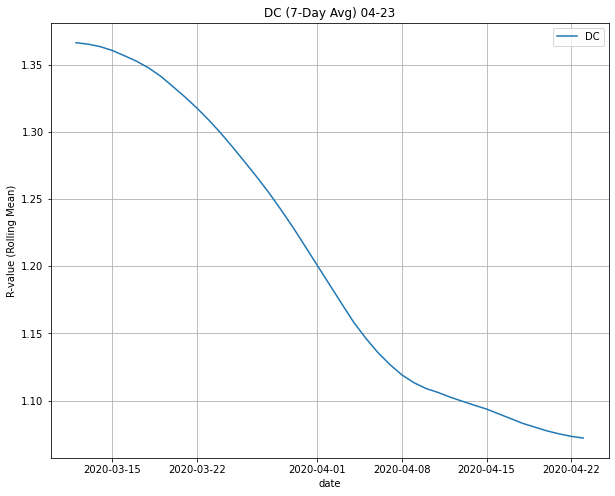

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

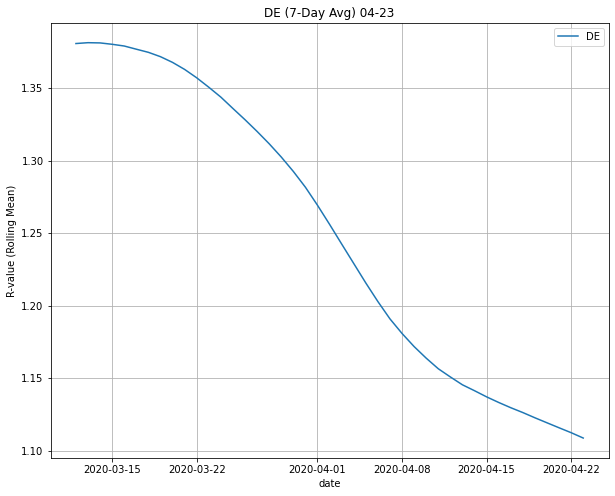

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

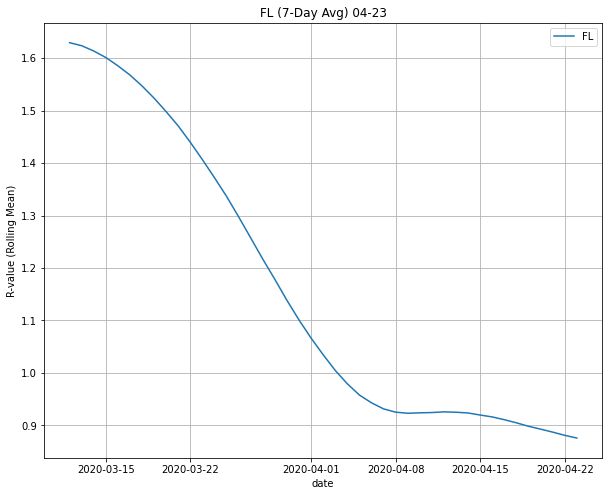

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

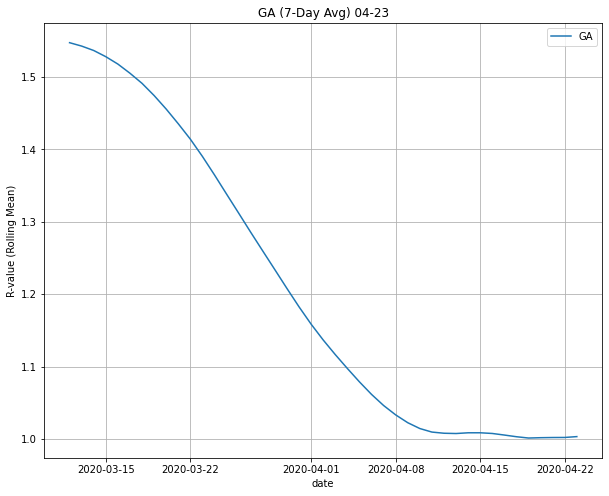

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

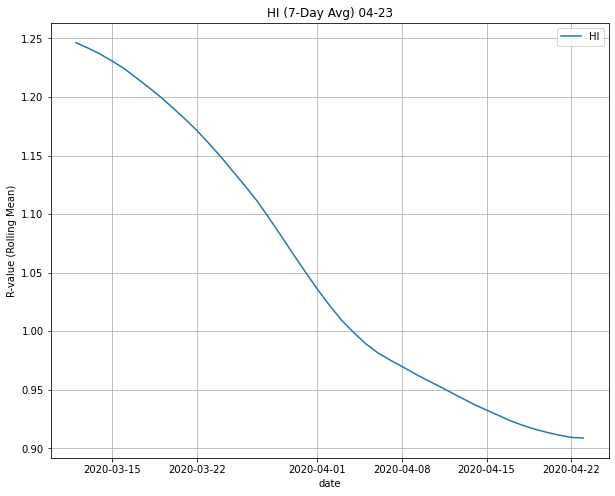

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

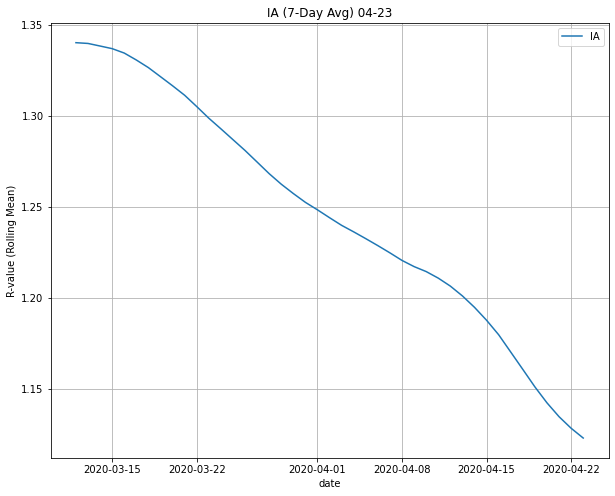

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

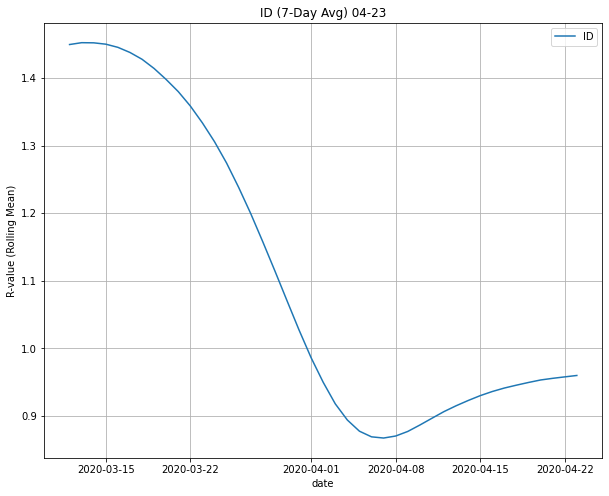

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

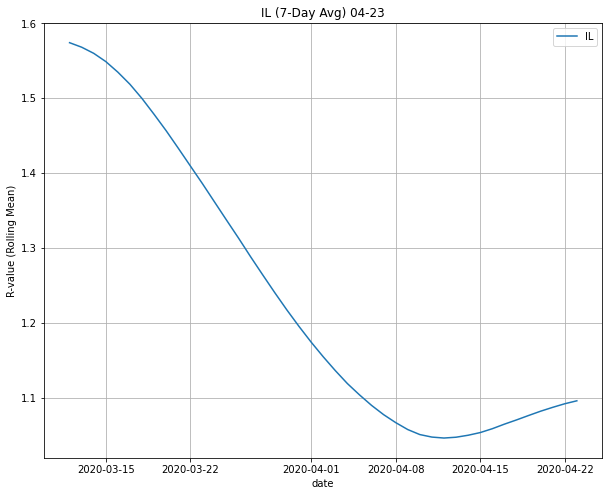

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

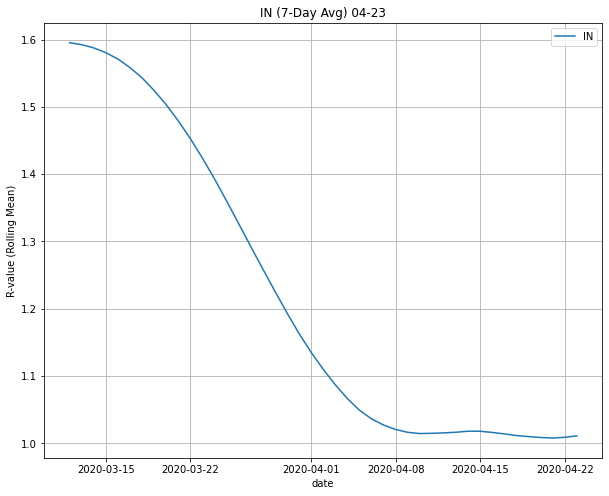

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

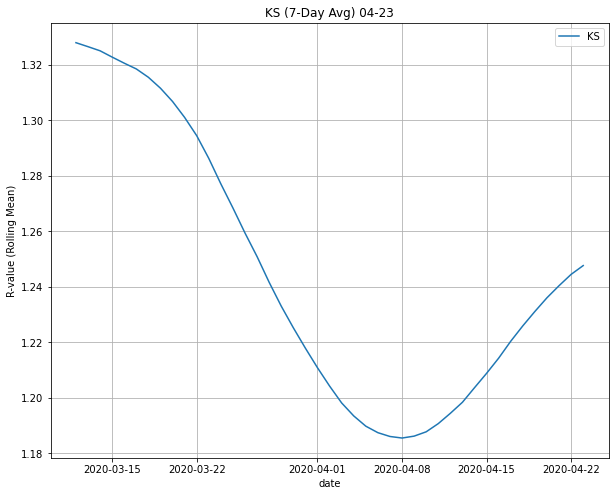

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

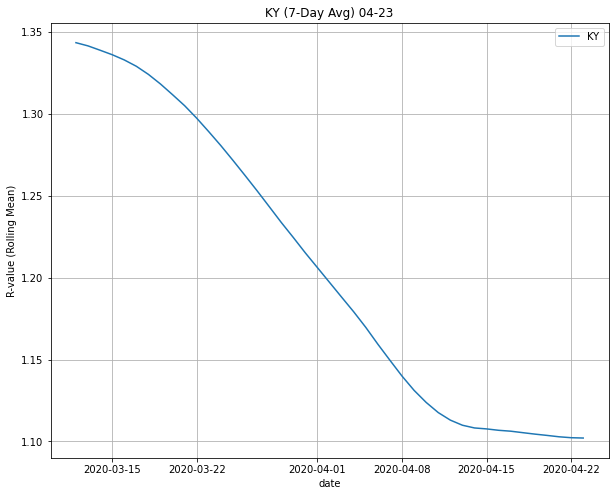

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

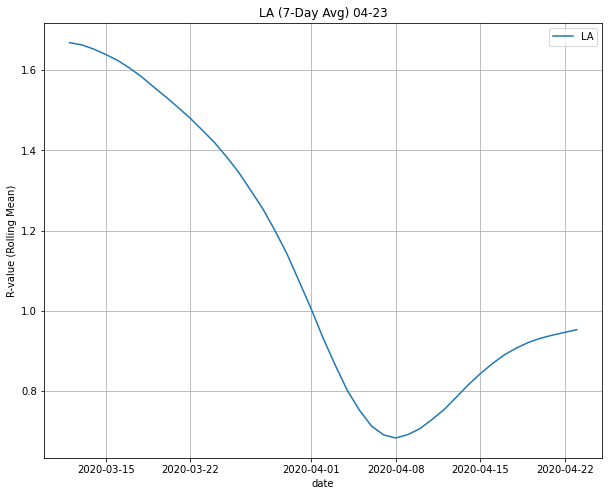

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

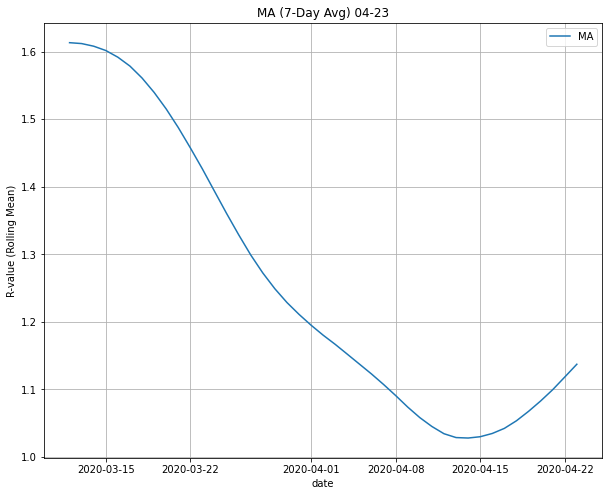

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

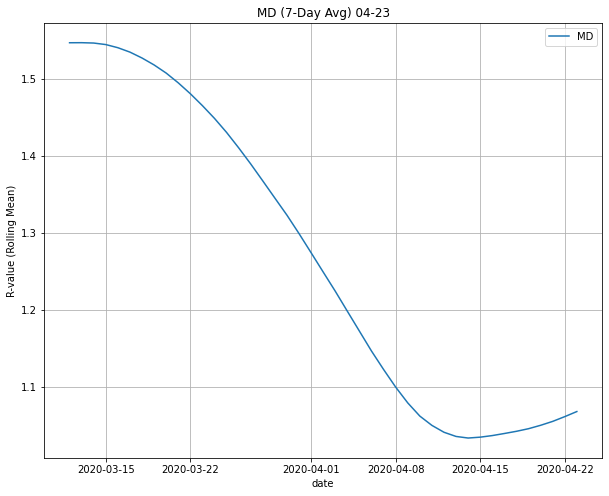

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

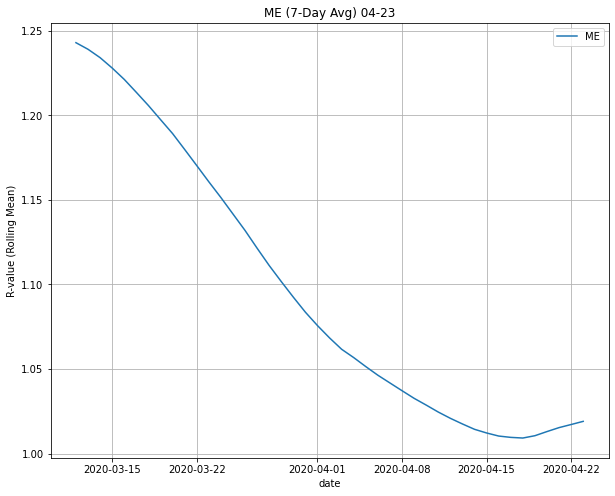

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

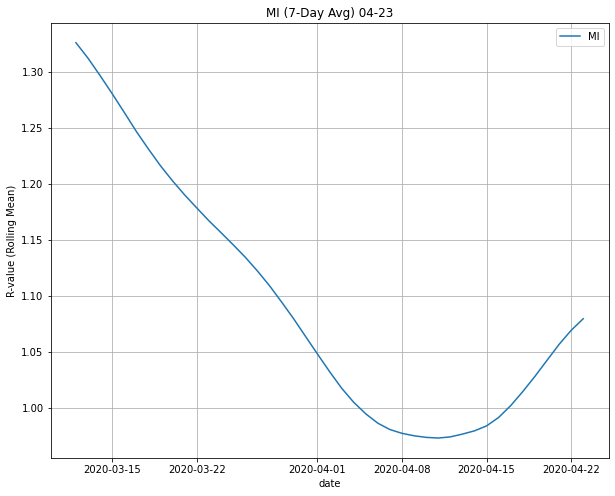

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

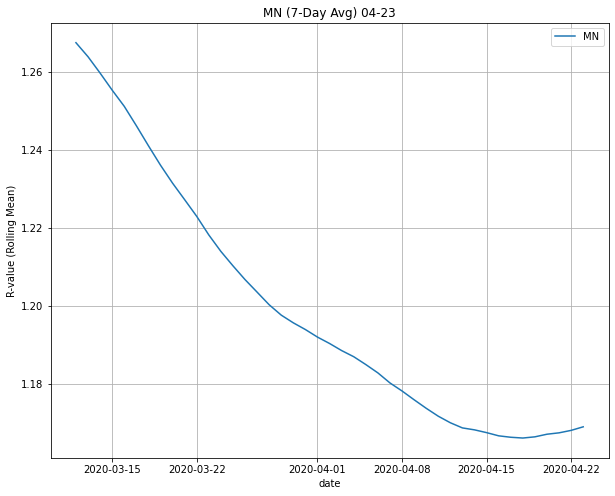

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

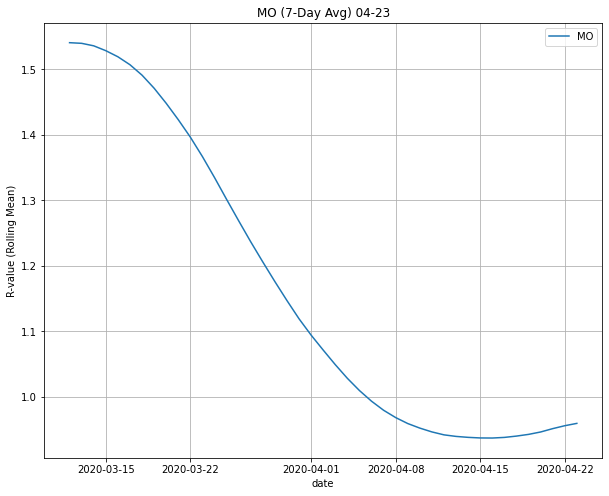

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

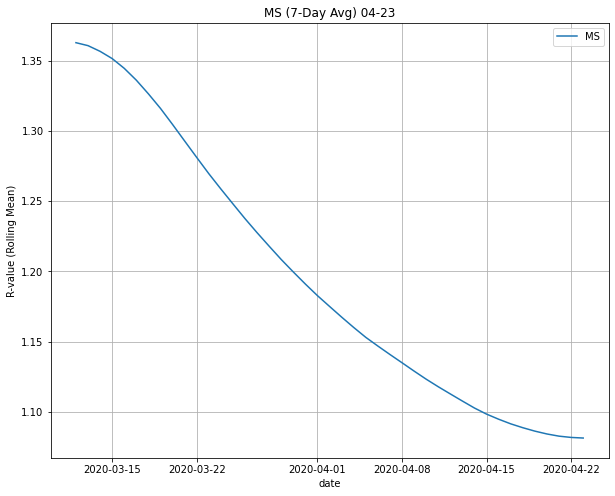

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

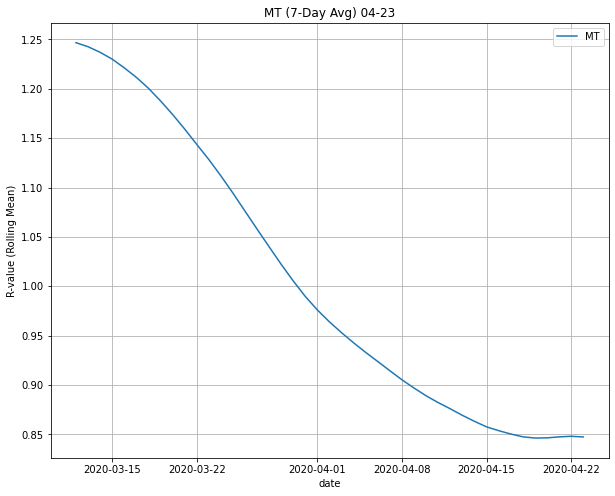

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

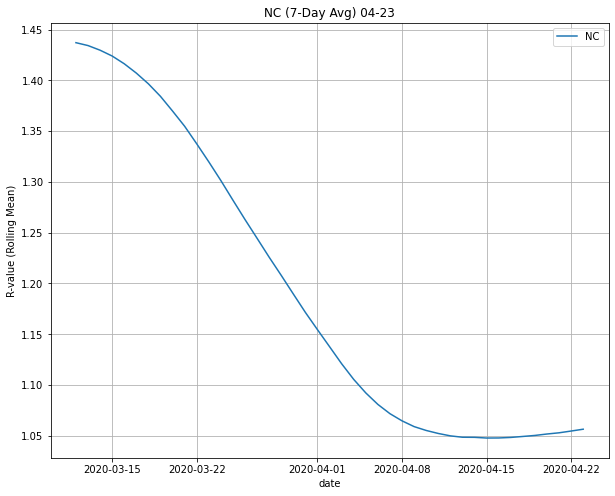

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

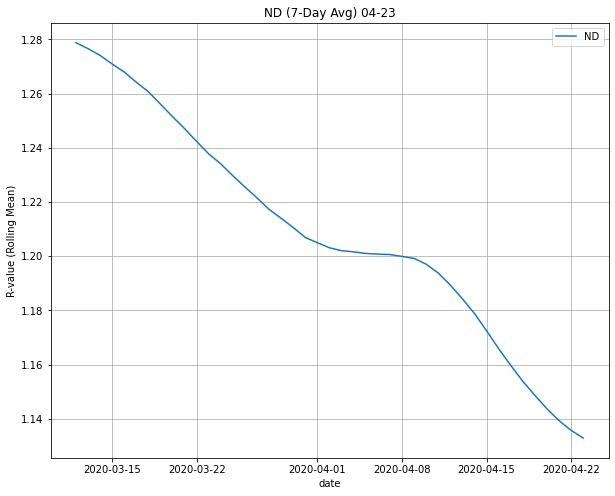

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

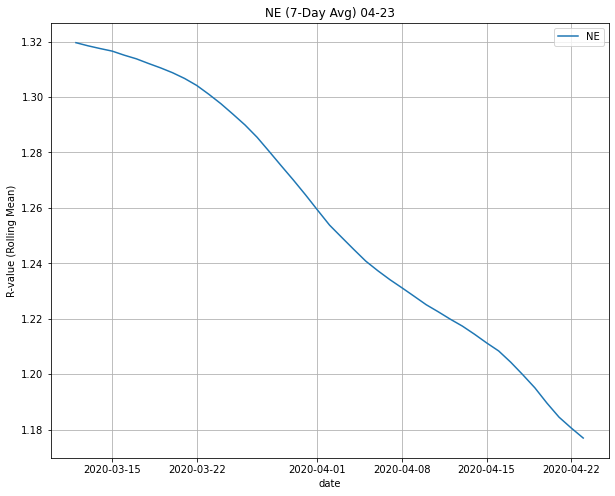

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

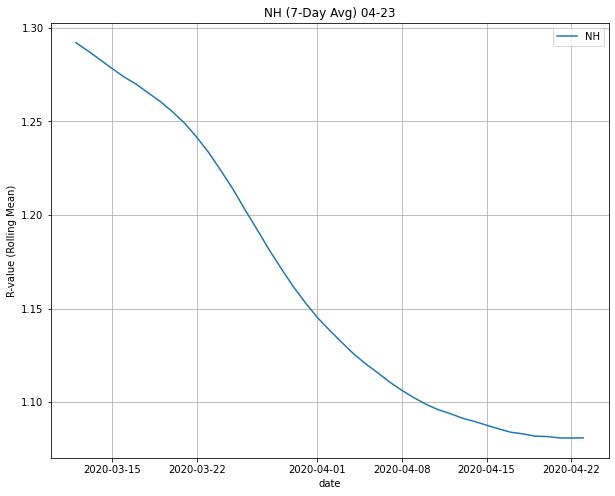

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

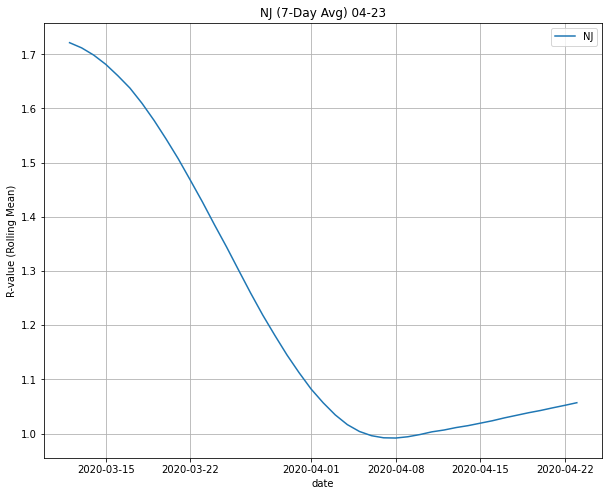

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

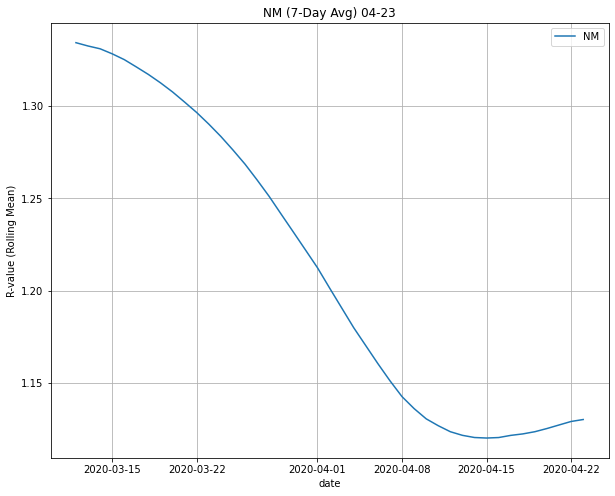

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

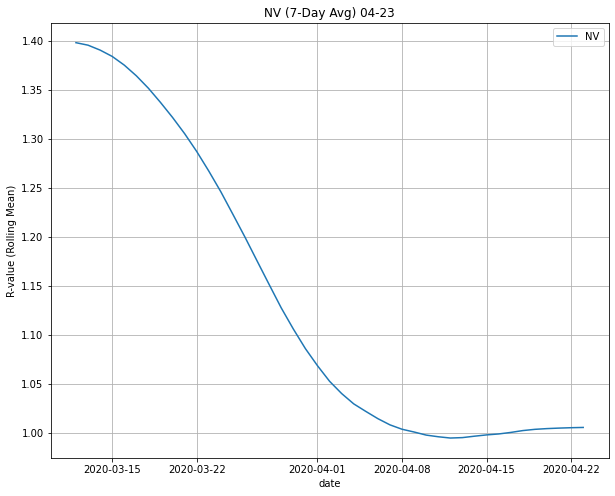

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

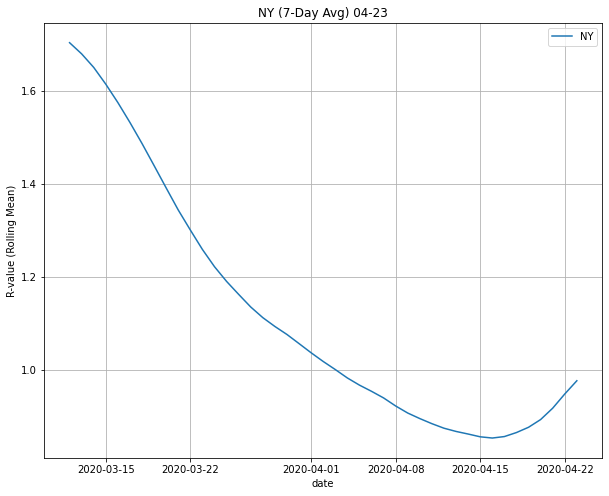

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

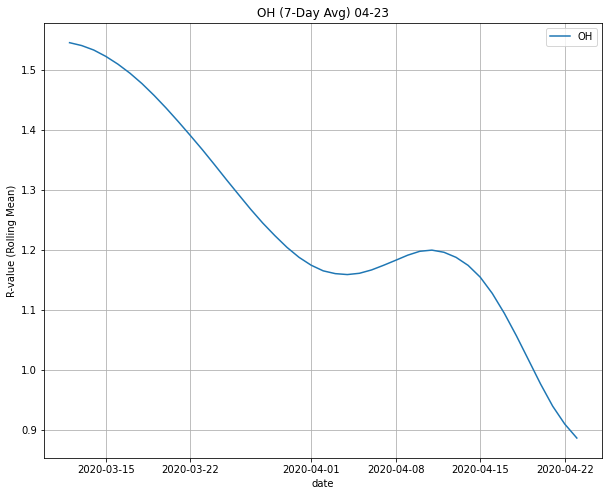

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

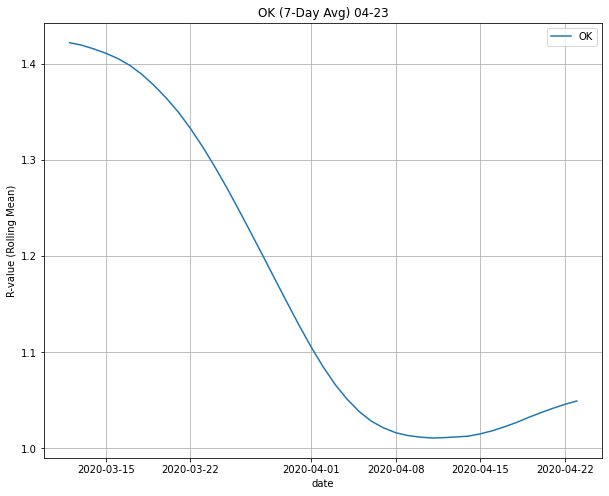

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

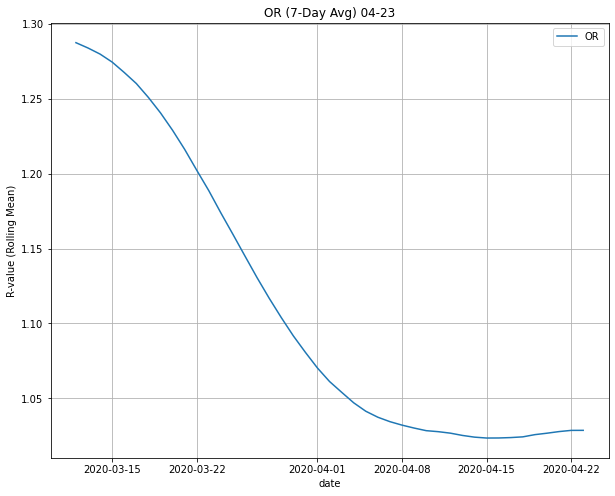

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

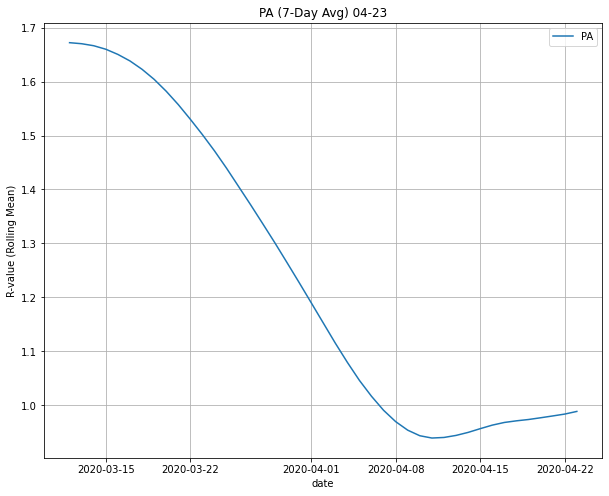

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

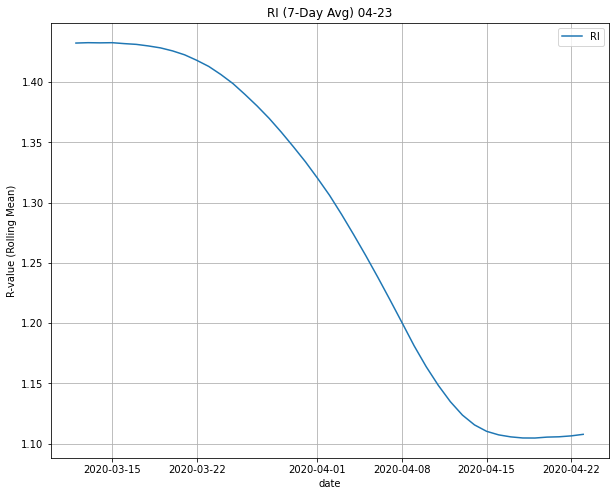

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

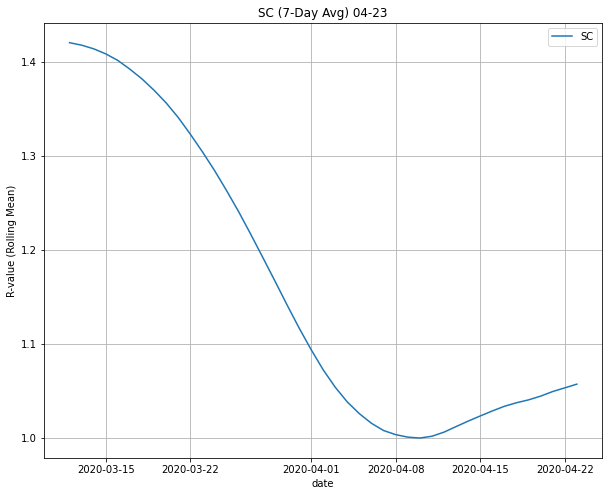

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

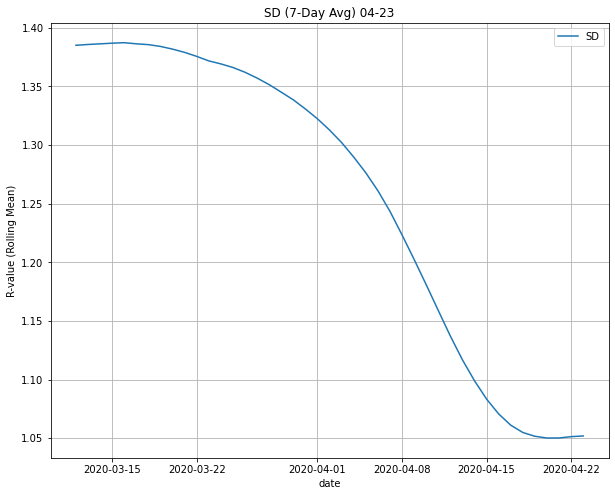

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

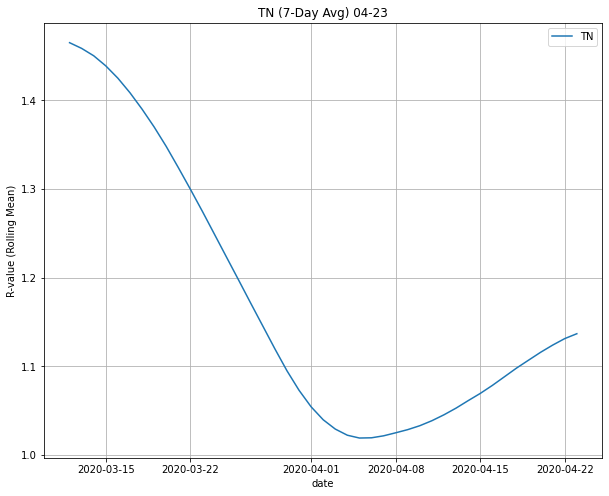

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

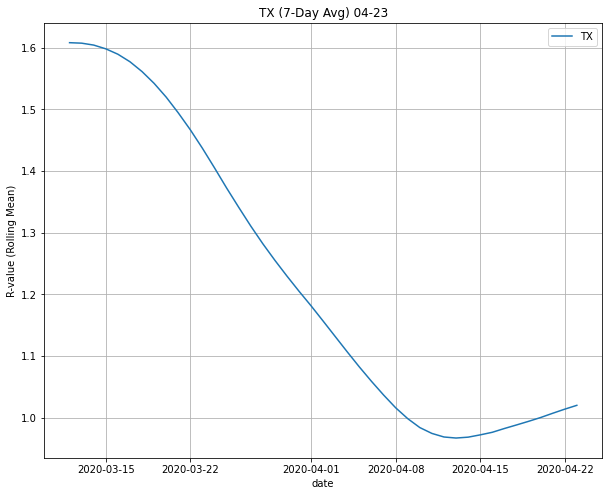

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

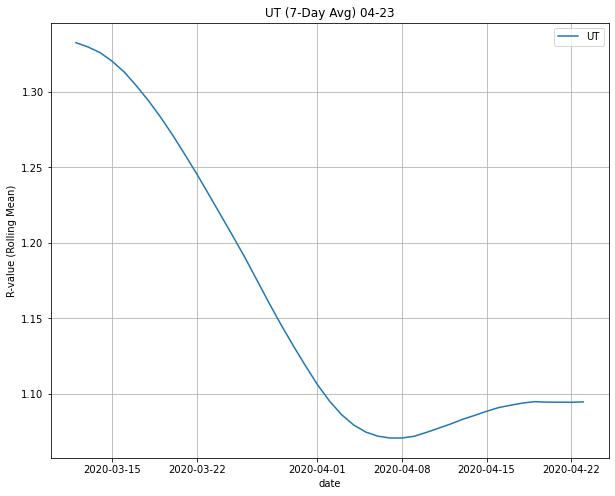

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

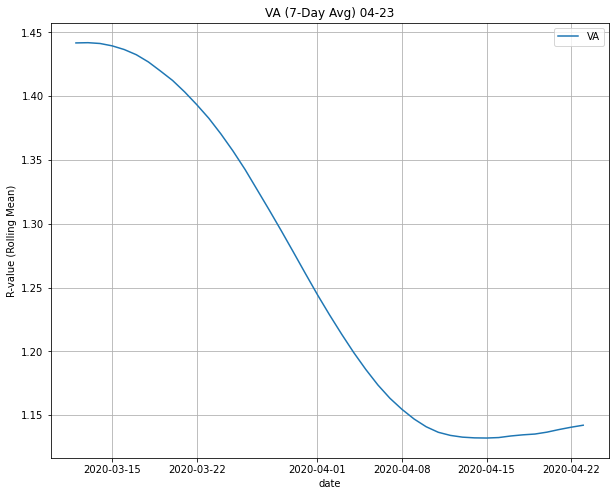

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

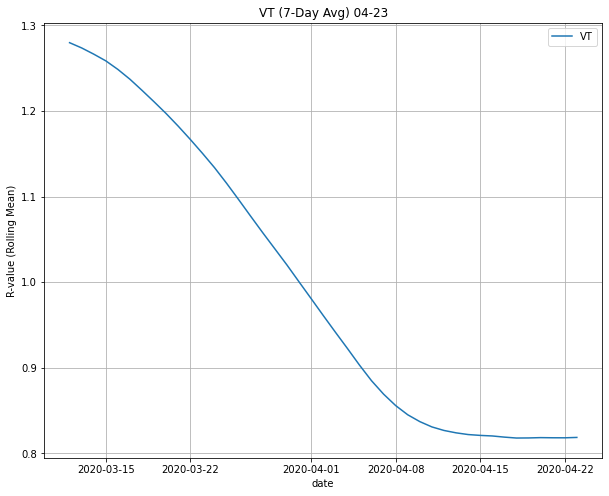

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

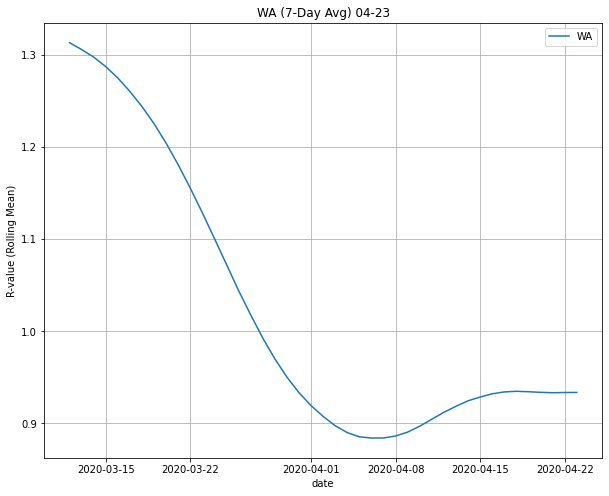

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

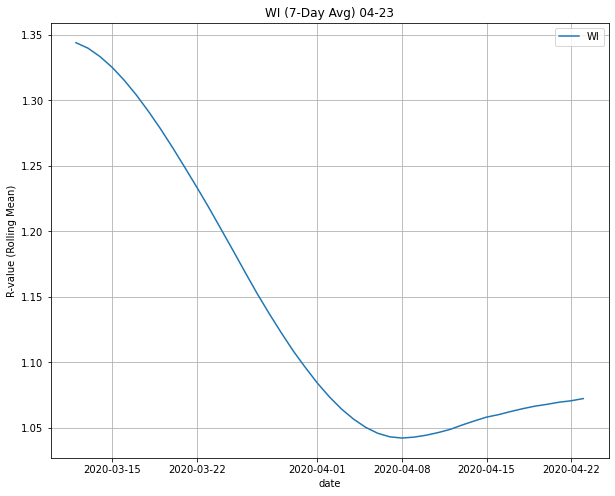

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

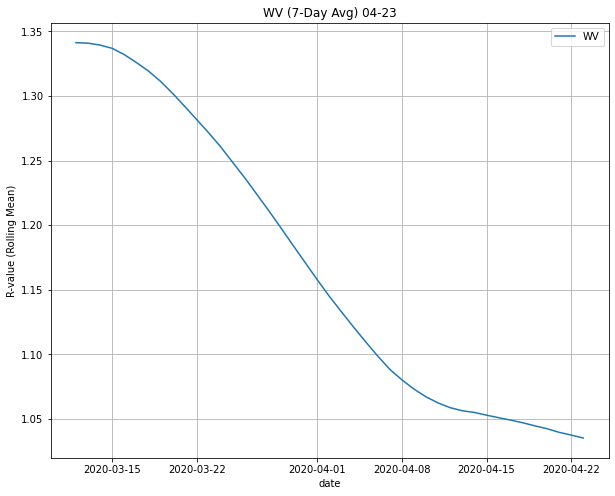

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

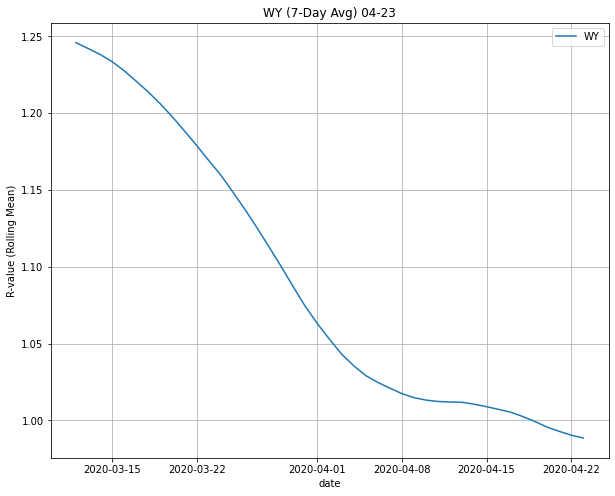

<IPython.core.display.Javascript object>

In [111]:
# Show Time Series (Every State) that plots 
# 7-Day Average in separate Tabs 
df_ML_SMA = rolling_mean(df, 7, 'mean')

tb = widgets.TabBar(states.tolist(), location='top')
for state in states:
  with tb.output_to(state):
    plot_timeseries_rollingmean(df_ML_SMA, [state], state+' (7-Day Avg) '+ date[-5:])

